In [1]:
import pandas as pd
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#res = pd.read_csv('exp_results.csv')
res = pd.read_csv('shopee_results.csv')

res

,id,hypers,f1_score
0,1,"{'adam_eps': 4.231921981517087e-05, 'adam_mom'...",0.814901
1,2,"{'adam_eps': 3.63862743088688e-05, 'adam_mom':...",0.803538
2,3,"{'adam_eps': 4.6220876107919754e-05, 'adam_mom...",0.793954
3,4,"{'adam_eps': 3.2370295377586055e-05, 'adam_mom...",0.789229
4,5,"{'adam_eps': 4.5888398354335194e-05, 'adam_mom...",0.813444
...,...,...,...
189,195,"{'adam_eps': 7.902768526125083e-05, 'adam_mom'...",0.804665
190,196,"{'adam_eps': 3.5313557467477994e-05, 'adam_mom...",0.812197
191,197,"{'adam_eps': 6.251401973873413e-05, 'adam_mom'...",0.812094
192,198,"{'adam_eps': 4.251652477145004e-05, 'adam_mom'...",0.817884


In [23]:
def get_hyper(row, name):
    hypers= eval(row.hypers)
    return hypers[name]

In [24]:
skip = [ 'num_epochs', 'experiment_id','bert_path', 'embs_dim','train_epochs', 'train_freeze_epochs' ]
hypers = eval(res.iloc[0].hypers).keys()
for hyper in hypers:
    res[hyper] = [get_hyper(row, hyper) for _,row in res.iterrows()]

In [26]:
res[res.f1_score>.819]

,id,hypers,f1_score,adam_eps,adam_mom,adam_sqr_mom,adam_wd,arc_easymargin,arcface_m,arcface_s,...,droput_p,embs_dim,experiment_id,label_smooth,lr,lr_mult,tokens_max_length,train_epochs,train_freeze_epochs,use_argmargin
8,9,"{'adam_eps': 4.026371181610928e-05, 'adam_mom'...",0.819578,0.000040,0.934180,0.994030,0.033193,0,0.179271,29.517932,...,0.583469,768,9,0.089324,0.004294,36.0,67,12,1,0
67,68,"{'adam_eps': 4.90994570318907e-05, 'adam_mom':...",0.821487,0.000049,0.929247,0.994581,0.046006,0,0.345052,18.074183,...,0.113735,768,68,0.166999,0.007264,96.0,78,12,3,0
79,80,"{'adam_eps': 3.3332142470952975e-05, 'adam_mom...",0.819083,0.000033,0.843560,0.990408,0.025547,0,0.446536,17.944971,...,0.193389,768,80,0.151985,0.004132,68.0,64,12,3,0
124,127,"{'adam_eps': 1.962353848762347e-05, 'adam_mom'...",0.819598,0.000020,0.890276,0.996618,0.047245,1,0.776051,17.788667,...,0.174110,768,127,0.021252,0.005181,45.0,75,12,1,0
151,157,"{'adam_eps': 4.635473206314774e-05, 'adam_mom'...",0.819189,0.000046,0.911474,0.991424,0.021703,1,0.441934,18.357134,...,0.260976,768,157,0.133214,0.007703,81.0,58,12,1,0
165,171,"{'adam_eps': 7.150362790113695e-05, 'adam_mom'...",0.819778,0.000072,0.909031,0.998084,0.012429,1,0.718234,17.542716,...,0.171370,768,171,0.089233,0.004121,77.0,99,12,1,1
181,187,"{'adam_eps': 7.828713519767946e-05, 'adam_mom'...",0.819469,0.000078,0.819186,0.987526,0.036378,0,0.466652,25.467232,...,0.317575,768,187,0.012659,0.005512,79.0,79,12,1,1


In [27]:
arcmargin=res[res.use_argmargin==1]
arcface=res[res.use_argmargin==0]


In [28]:
arcmargin_easy=arcmargin[arcmargin.arc_easymargin==1]
arcmargin_hard=arcmargin[arcmargin.arc_easymargin==0]

In [29]:
arcmargin_easy.f1_score.mean(), arcmargin_easy.f1_score.max()

(0.8089520140133141, 0.8197778215396109)

In [30]:

arcmargin_hard.f1_score.mean(), arcmargin_hard.f1_score.max()

(0.7966725130762027, 0.8194687378946036)

In [31]:
arcface.f1_score.mean(), arcface.f1_score.max()

(0.8010026185985866, 0.8214870308658161)

In [32]:
def plot(hyper, key='lwlrap'):
    hyper2key = [(get_hyper(row, hyper), row[key]) for _,row in res.iterrows()]
    plt.title(hyper)
    plt.scatter(*zip(*hyper2key))
    plt.show()

In [33]:
skip = [ 'num_epochs', 'experiment_id','bert_path', 'embs_dim','train_epochs', 'train_freeze_epochs', 'arc_easymargin', 'use_argmargin' ]
hypers = eval(res.iloc[0].hypers).keys()
for hyper in hypers:
    if hyper not in skip:
        print(hyper, res['f1_score'].corr(res[hyper],method='spearman'))

adam_eps 0.09702390980100503
adam_mom 0.008703512715050559
adam_sqr_mom 0.18593599125621985
adam_wd -0.1000957378180817
arcface_m 0.02801543310063154
arcface_s 0.10710062332304733
droput_p -0.20342683863863287
label_smooth 0.027116401572894275
lr 0.15780139949789004
lr_mult -0.049424876889435206
tokens_max_length 0.36136889386106247


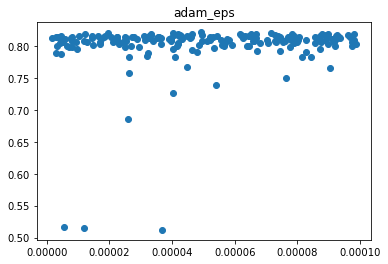

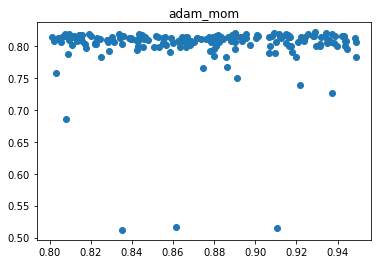

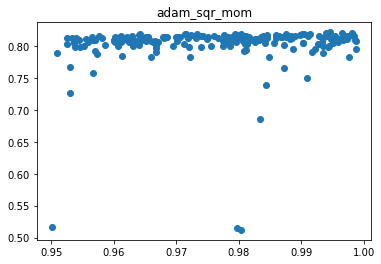

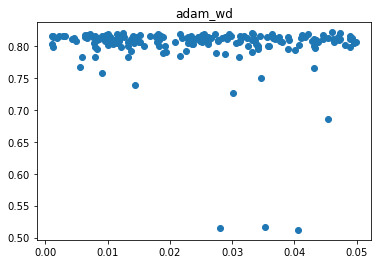

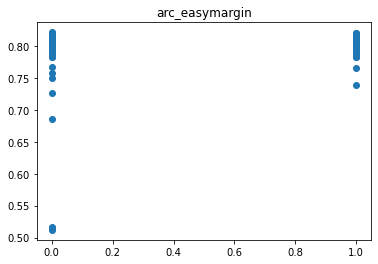

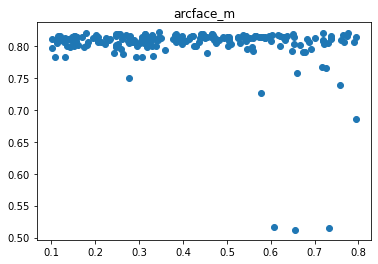

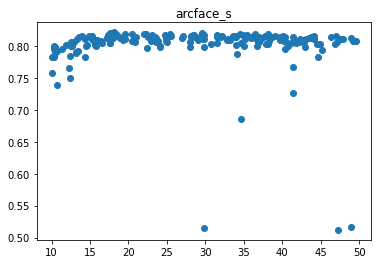

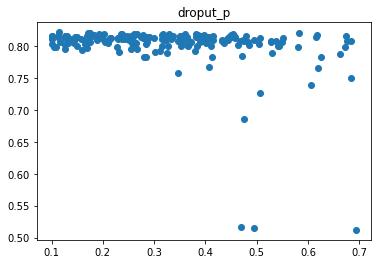

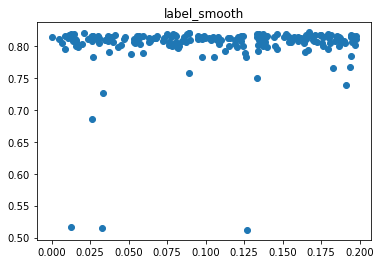

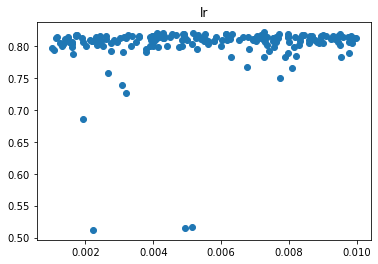

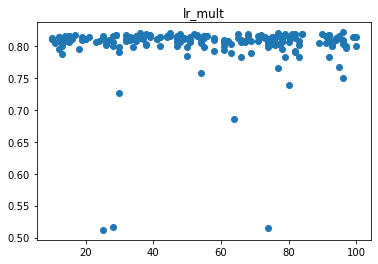

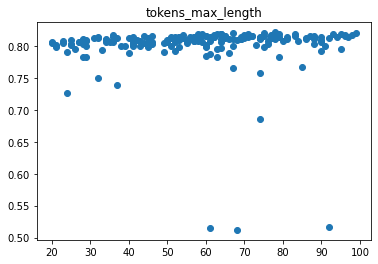

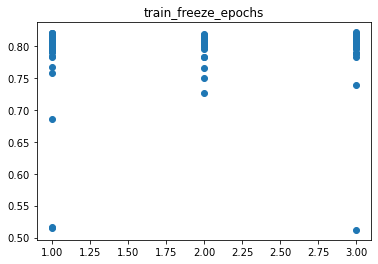

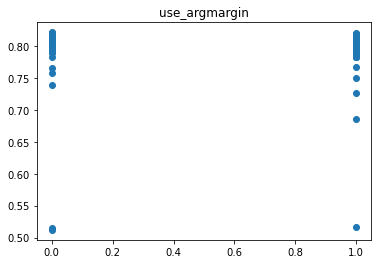

In [34]:
skip = [ 'num_epochs', 'experiment_id','bert_path', 'embs_dim','train_epochs' ]
hypers = eval(res.iloc[0].hypers).keys()
for hyper in hypers:
    
    if hyper not in skip: plot(hyper, 'f1_score')